# CrossSellPredict


In [25]:
# Import library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## Dataset

In [3]:
# Load data
dataset = pd.read_csv("train.csv")
dataset

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
dataset["Policy_Sales_Channel"].value_counts() # Sale_channel -> unnecessary

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [5]:
# Drop id, Policy_Sales_Channel
dataset.drop(columns = ["id", "Policy_Sales_Channel"], inplace=True)

In [15]:
# Dummy Gender
dataset = pd.get_dummies(dataset, columns=["Gender"], drop_first=True)

In [7]:
# Scale
scaler = MinMaxScaler()
dataset[["Age", "Annual_Premium", "Vintage"]] = scaler.fit_transform(dataset[["Age", "Annual_Premium", "Vintage"]])

In [8]:
# Convert Region_Code to 0 and 1
dataset["Region_Code"] = dataset["Region_Code"].apply(lambda x: 1 if x == 28 else 0)

In [9]:
dataset["Region_Code"].value_counts()

Region_Code
0    274694
1    106415
Name: count, dtype: int64

In [10]:
# Processing column Vehicle_Age
dataset["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [11]:
dataset = pd.get_dummies(dataset, columns=["Vehicle_Age"], drop_first=True)

In [17]:
# Get dummy Vehicle_Damage
dataset = pd.get_dummies(dataset, columns=["Vehicle_Damage"], drop_first=True)

In [18]:
dataset.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Male,Vehicle_Damage_Yes
0,0.369231,1,1,0,0.070366,0.716263,1,False,True,True,True
1,0.861538,1,0,0,0.057496,0.598616,0,False,False,True,False
2,0.415385,1,1,0,0.066347,0.058824,1,False,True,True,True
3,0.015385,1,0,1,0.048348,0.667820,0,True,False,True,False
4,0.138462,1,0,1,0.046259,0.100346,0,True,False,False,False


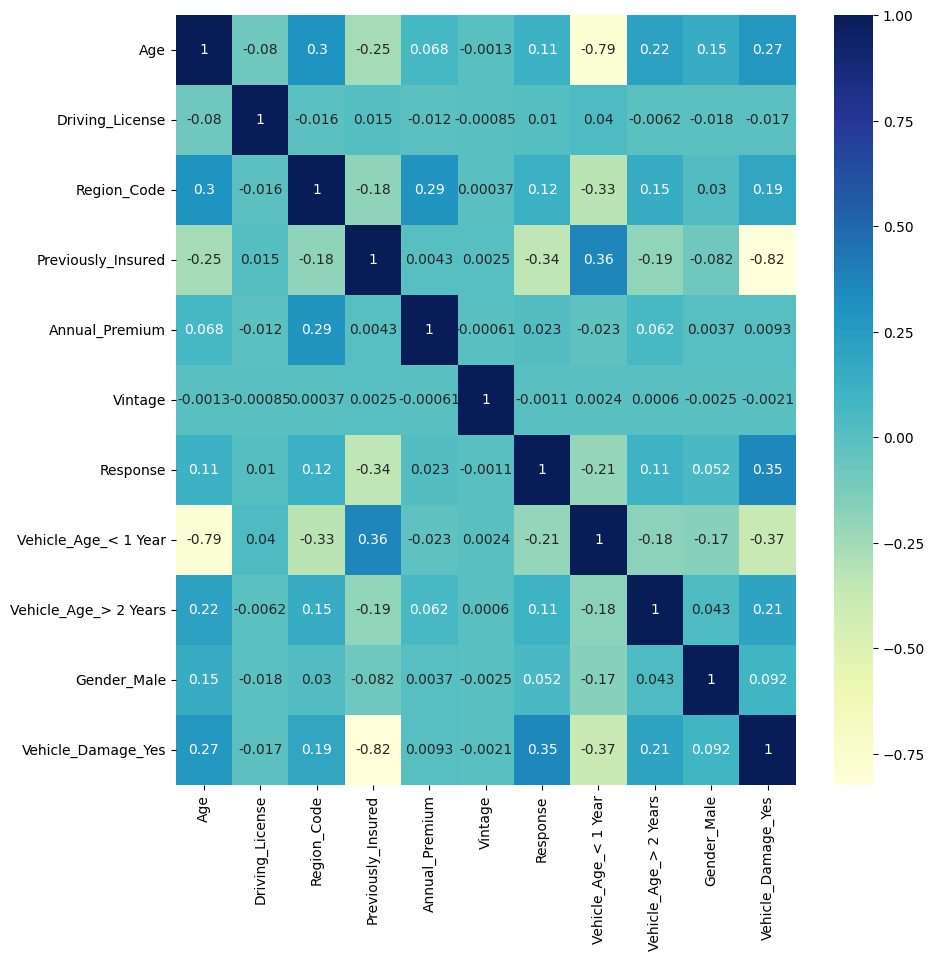

In [20]:
# Corr -> Có thể drop đi một trong 2 cột phụ thuộc vào nhau
fig, ax = plt.subplots(figsize=(10, 10))
dataplot = sns.heatmap(dataset.corr(), annot=True, ax=ax, cmap="YlGnBu")

In [21]:
X = dataset.drop(columns="Response")
y = dataset["Response"]
X.shape, y.shape

((381109, 10), (381109,))

In [23]:
# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Analyse data train
y_train.value_counts()

Response
0    267700
1     37187
Name: count, dtype: int64

In [27]:
# Oversampling use SMOTE
sm = SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_sm.shape, y_train_sm.shape

((535400, 10), (535400,))

In [28]:
y_train_sm.value_counts()

Response
1    267700
0    267700
Name: count, dtype: int64

## Logistic Regression no OverSampling

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       1.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.94      0.50      0.47     76222
weighted avg       0.89      0.88      0.82     76222



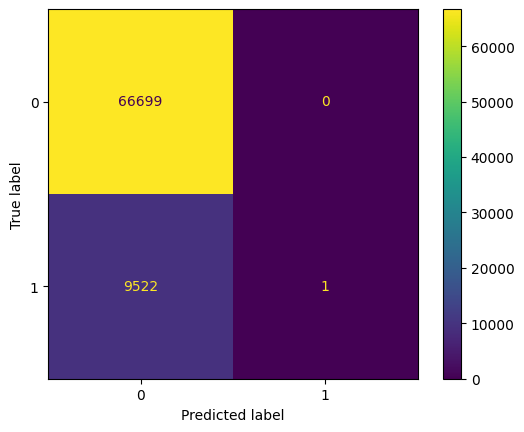

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Logistic Regression on OverSampling

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



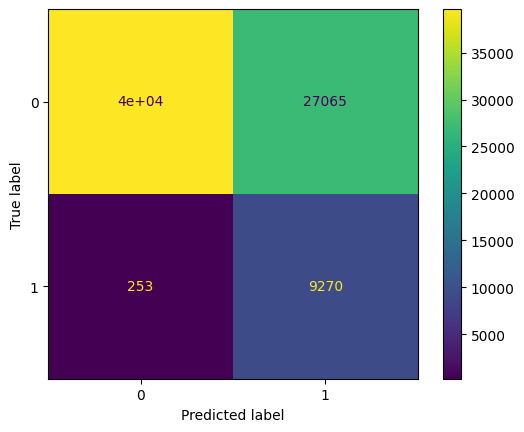

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train_sm, y_train_sm)

y_pred = model_log.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## XGBoost with No SM, SM

In [32]:
X_train = X_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_test = X_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_train_sm = X_train_sm.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.40      0.01      0.01      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.50      0.47     76222
weighted avg       0.82      0.87      0.82     76222



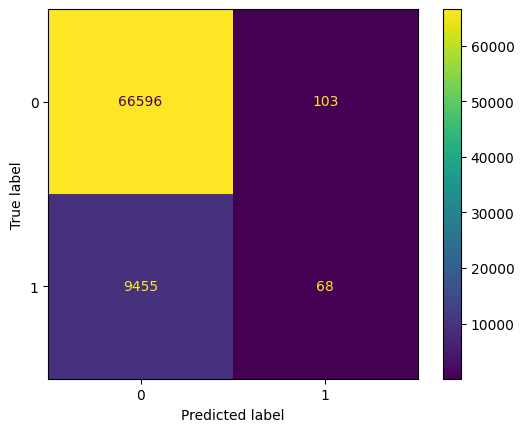

In [33]:
import xgboost as xgb

# No OverSampling
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66699
           1       0.29      0.86      0.44      9523

    accuracy                           0.72     76222
   macro avg       0.63      0.78      0.62     76222
weighted avg       0.89      0.72      0.77     76222



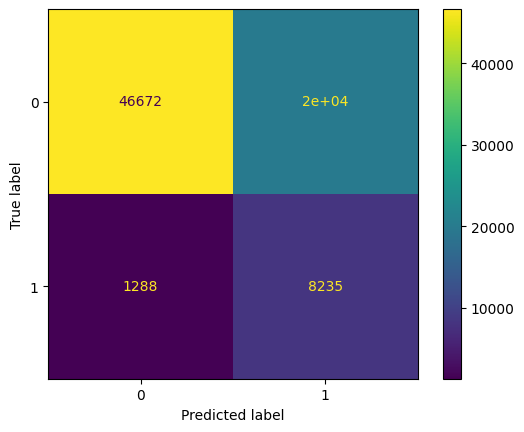

In [34]:
import xgboost as xgb

# No OverSampling
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(X_train_sm, y_train_sm)

y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66699
           1       0.32      0.16      0.21      9523

    accuracy                           0.85     76222
   macro avg       0.60      0.55      0.56     76222
weighted avg       0.82      0.85      0.83     76222



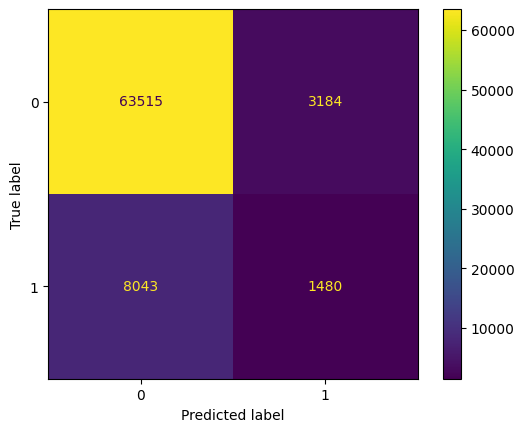

In [35]:
# RandomForest with Os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     66699
           1       0.30      0.48      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.66      0.63     76222
weighted avg       0.84      0.80      0.82     76222



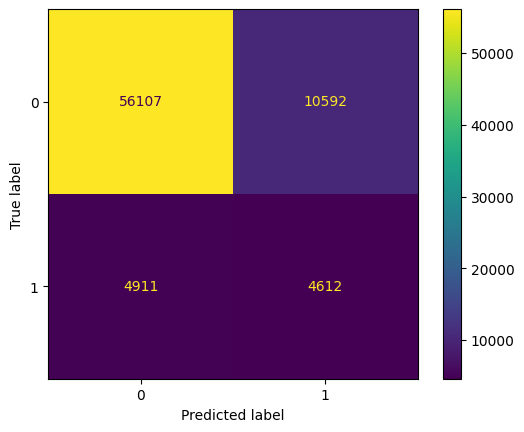

In [36]:
# RandomForest with Os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train_sm, y_train_sm)
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)